 ## Homework 2 (X points): Due X @ Xpm
 
Below is an example homework problem - in this case a plot. 
 

 
 Use the data/precipitation/805325-precip-dailysum-2003-2013.csv file to create:

PLOT 1: a plot of precipitation from 2003 to 2013 using matplotlib.

PLOT 2: a plot that shows precipitation SUBSETTED from Aug 15 - Oct 15 2013 using matplotlib.

Use the data/discharge/06730200-discharge-daily-1986-2013.csv file to create:

PLOT 3: a plot of stream discharge from 1986 to 2013 using matplotlib.

PLOT 4: a plot that shows stream discharge SUBSETTED from Aug 15 - Oct 15 2013 using matplotlib.

PLOT 5: a plot of DAILY precipitation from Jan 1 - Oct 15 2013

BONUS
PLOT 6: a plot of HOURLY precipitation rounded to the nearest .1in from 1948-2013

In [1]:
# Import all libraries

### BEGIN SOLUTION
import os
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import earthpy as et

os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))
et.data.get_data('colorado-flood')
### END SOLUTION
# Get the data 
et.data.get_data('colorado-flood')

'/Users/leah-su/earth-analytics/data/colorado-flood/.'

## PLOT 1 

Use pandas to open and process the `data/colorado-flood/discharge/06730200-discharge-daily-1986-2013.txt` txt file. Using this data, create a **scatter plot** using `ax.scatter` of **monthly maximum stream discharge from 1990-2014**. 
Document your steps used to process the data in a markdown cell BELOW the plot
use pandas, make sure the dataframe has a datetime index
calculate a monthly max value
 
Subset the data to the time period: 1990-2014 using pandas syntax ["":""]. This means that your date column should be setup as an index.

In [2]:
import unittest
import matplotlib.pyplot as plt
import autograde.notebook as nb
# https://github.com/earthlab/autograde  <- autograd lives herehttps://github.com/earthlab/earth-analytics-python/tree/master/ea-class-autograde 

from earthanalytics.hw2_tests import homework2_tests 
# ^^^ https://github.com/earthlab/earth-analytics-python/tree/master/ea-class-autograde 
# pip install -e . in the earth-analytics-python repo after cloning ofcourse 


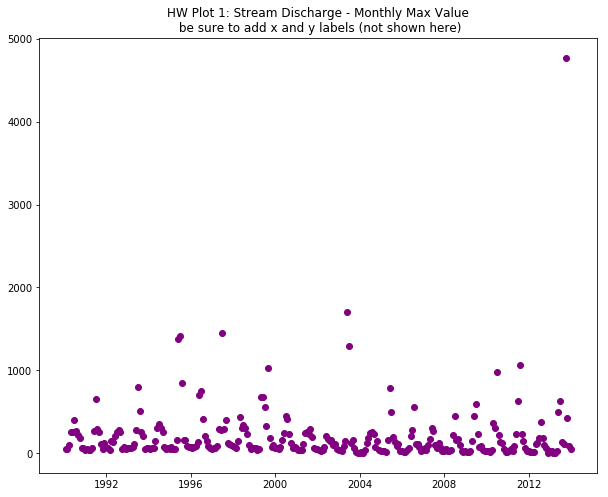

In [3]:
# For PLOT 1&2: use the data/colorado-flood/precipitation/805325-precip-dailysum-2003-2013.csv file

# PLOT 1: a plot of precipitation from 2003 to 2013
# DO NOT USE plt.show() anywhere in this cell

### BEGIN SOLUTION

f = "data/colorado-flood/discharge/06730200-discharge-daily-1986-2013.txt"
discharge = pd.read_csv(f,
                        skiprows=23,
                        header=[1, 2],
                        sep='\t',
                        parse_dates=[2])
discharge.columns = discharge.columns.droplevel(1)
discharge = discharge.set_index(["datetime"])

monthly_max_all = discharge.resample("M").max()
monthly_max = monthly_max_all['1990':'2014']

# VARIOUS WAYS TO FORM PLOT:
pcase = 2

# 2.subplot with 'scatter()'
if pcase == 2:
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.scatter(x=monthly_max.index,
           y=monthly_max["17663_00060_00003"],
           color="purple")

# 3.subplot using date as index
if pcase == 3:
    fig, ax = plt.subplots(figsize=(10, 5))
    bdp = bdp.set_index('DATE')
    ax.scatter(bdp.index, bdp['DAILY_PRECIP'])

# VARIOUS WAYS TO ADD TITLES:
tcase = 4
# 1.subplot titles
if tcase == 1:
    ax.set(xlabel='Date', ylabel='Daily Precipitation (inches)',
           title='Homework plot 1: Precipitation-Boulder, CO\n 2013-2014')

# 2.figure and subplot titles
if tcase == 2:
    fig.suptitle('Homework plot 1: Precipitation-Boulder, CO\n 2013-2014')
    ax.set_xlabel('Date')
    ax.set_ylabel('Daily Precipitation (inches)')

# 3.plot title (no subplots)
if tcase == 3:
    plt.title('Homework plot 1: Precipitation-Boulder, CO\n 2013-2014')
    plt.xlabel('Date')
    plt.ylabel('Daily Precipitation (inches)')
if tcase == 4: 
    ax.set_title(
    "HW Plot 1: Stream Discharge - Monthly Max Value\n be sure to add x and y labels (not shown here)")

### END SOLUTION

### DO NOT REMOVE LINE BELOW ###
ax1 = nb.convert_axes(plt)

Here are a set of public basic tests that we want to run. I want to check things like

1. is it a scatter plot?
2. is there a title x and y label (we would look for units specifically in the local test)
3. maybe - maybe i'd even check to see that the data look correct - so maybe i'd check for the start and end date of the data and
4. are there any no data values in the data. (-9999)

A few tests are below - not sure if they all work yet.

Honestly i have a lot of questions about the setup of this package.. so might need to get some oop help here.



In [48]:
from autograde.base import PlotTester
t=PlotTester(ax1)

# Run a set of basic tests
# The question here becomes
t.assert_plot_type("scatter")
t.assert_title_contains("x")

Here is a "private" test. This is a test suite that fully tests the data.
You can find the python package here where these tests live 

https://github.com/earthlab/earth-analytics-python/tree/master/ea-class-autograde 

i haven't yet pulled this out of the ea-python repo but the idea was we could build data specific tests that we could run on the homeworks in a package which we then run locally or in travis if that won't expose the answers. i think locally is just fine. 

In [ ]:
# from autograde.cases import PlotBasicSuite

# t = PlotBasicSuite(ax=ax1, plot_type="scatter")
# t.LabelsCase.test_title_exist

# Test Suite for Plot 1 - i don't fully understand how this works 
hw2t = homework2_tests()
results = unittest.TextTestRunner(verbosity=2).run(hw2t.p1_tests(ax=ax1))

Probably somewhere i'll ask them for the pandas dataframe 

Describe and interpret data from plot 1:

"Your Answer Here"

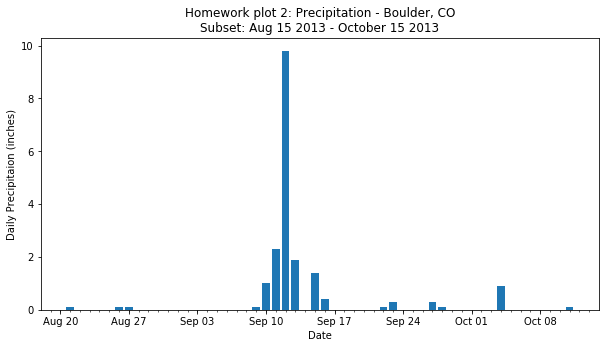

In [5]:
# PLOT 2: a plot that shows precipitation SUBSETTED from Aug 15 - Oct 15 2013 
# DO NOT USE plt.show() anywhere in this cell

### BEGIN SOLUTION

# VARIOUS WAYS TO SUBSET DATA
dcase = 1
if dcase == 1:
    bdp_subset = bdp.query('DATE >= "2013-08-15" and DATE <= "2013-10-15"')
if dcase == 2:
    bdp_subset = bdp[(bdp['DATE'] >= "2013-08-15") &
                             (bdp['DATE'] <= "2013-10-15")]

# VARIOUS WAYS TO FORM PLOT
pcase = 1
# 1.create subsetted data and plot
if pcase == 1:
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(bdp_subset['DATE'].values, bdp_subset['DAILY_PRECIP'])

# 2.plot data then create xlims
if pcase == 2:
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot('DATE', 'DAILY_PRECIP', data=bdp)
    ax.set_xlim('2013-08-15', '2013-10-15')

# 3.bar plot data then create xlims
if pcase == 3:
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(bdp_subset['DATE'].values, bdp_subset['DAILY_PRECIP'])
    ax.set_xlim('2013-08-15', '2013-10-15')
    
# 4.scatter plot data then create xlims
if pcase == 4:
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(bdp.DATE.values, bdp.DAILY_PRECIP)
    ax.set_xlim('2013-08-15', '2013-10-15')


# add titles
ax.set(xlabel='Date', ylabel='Daily Precipitaion (inches)',
       title='Homework plot 2: Precipitation - Boulder, CO\nSubset: Aug 15 2013 - October 15 2013')

# add x axis ticks
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator())


# VARIOUS WAYS TO FORMAT TICK LABELS
tcase = 1
if tcase == 1:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  
if tcase == 2:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B %d'))

### END SOLUTION

### DO NOT REMOVE LINE BELOW ###
ax2 = nb.convert_axes(plt)

In [6]:
# Test Suite for Plot 2
hw2t = homework2_tests()
results = unittest.TextTestRunner().run(hw2t.p2_tests(ax2))

.........
----------------------------------------------------------------------
Ran 9 tests in 0.019s

OK


Describe and interpret data from plot 2:

"Your Answer Here"

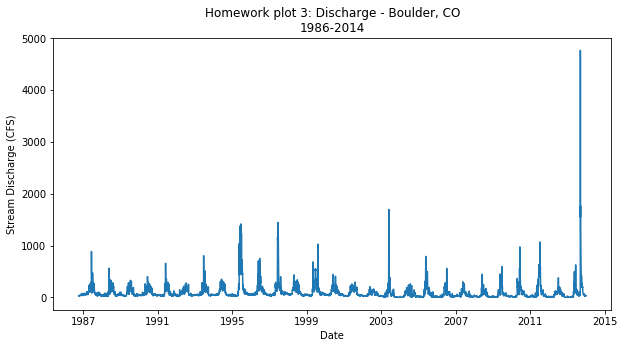

In [7]:
# For plots 3&4: Use the data/week-02/discharge/06730200-discharge-daily-1986-2013.csv file.

# PLOT 3: a plot of stream discharge from 1986 to 2013
# DO NOT USE plt.show() anywhere in this cell

### BEGIN SOLUTION
# import file
f = "data/week_02/discharge/06730200-discharge-daily-1986-2013.csv"
discharge = pd.read_csv(f, parse_dates=['datetime'])

# create subplot and graph daily_precip as a bar graph
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(discharge['datetime'], discharge['disValue'])

# set titles
ax.set_title("Homework plot 3: Discharge - Boulder, CO\n1986-2014")
ax.set_xlabel("Date")
ax.set_ylabel("Stream Discharge (CFS)")
### END SOLUTION

### DO NOT REMOVE LINE BELOW ###
ax3 = nb.convert_axes(plt)

In [8]:
# Test Suite for Plot 3
hw2t = homework2_tests()
results = unittest.TextTestRunner().run(hw2t.p3_tests(ax3))

...sss...
----------------------------------------------------------------------
Ran 9 tests in 0.159s

OK (skipped=3)


Describe and interpret data from plot 3:

"Your Answer Here"

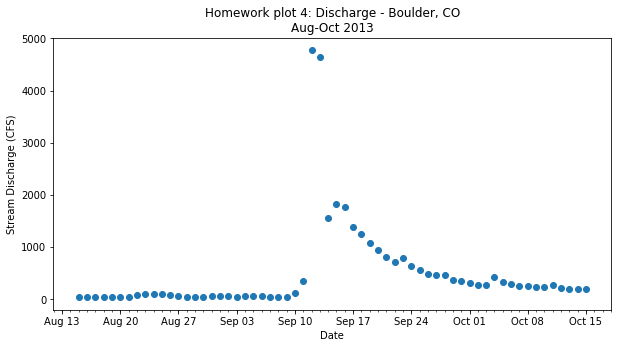

In [9]:
# PLOT 4: a plot that shows stream discharge SUBSETTED from Aug 15 - Oct 15 2013 
# DO NOT USE plt.show() anywhere in this cell

### BEGIN SOLUTION
discharge = discharge.rename(columns={"datetime": "Datetime"})

# make a dataframe of just the subsetted data
discharge_subset = discharge.query('Datetime >= "2013-08-15" and Datetime <= "2013-10-15"')

# Create subplot and graph daily_precip as a bar graph
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(discharge_subset['Datetime'],
        discharge_subset['disValue'], marker='o', linestyle='None')

# set titles
ax.set_title("Homework plot 4: Discharge - Boulder, CO\nAug-Oct 2013")
ax.set_xlabel("Date")
ax.set_ylabel("Stream Discharge (CFS)")

# set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_minor_locator(mdates.DayLocator())

### END SOLUTION

### DO NOT REMOVE LINE BELOW ###
ax4 = nb.convert_axes(plt)

In [10]:
# Test Suite for Plot 4
hw2t = homework2_tests()
results = unittest.TextTestRunner().run(hw2t.p4_tests(ax4))

.........
----------------------------------------------------------------------
Ran 9 tests in 0.020s

OK


Describe and interpret data from plot 4:

"Your Answer Here"

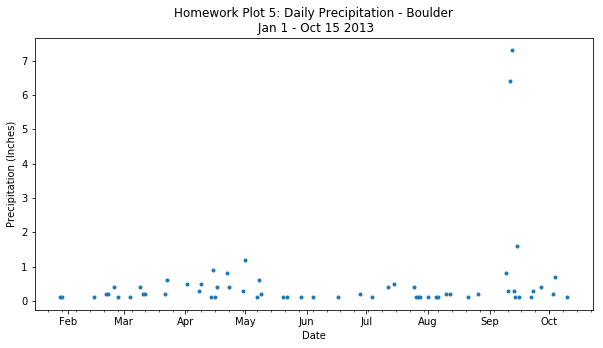

In [11]:
# Plot 5: use the data/precipitation/805333-precip-daily-1948-2013.csv file

# PLOT 5: a plot of DAILY precipitation from Jan 1 - Oct 15 2013
# DO NOT USE plt.show() anywhere in this cell

### BEGIN SOLUTION
# import file
f = "data/week_02/precipitation/805333-precip-daily-1948-2013.csv"
precip = pd.read_csv(f, parse_dates=['DATE'], na_values=[999.99])

# Create a new dataframe with resample and rid of Nan values
case = 1
# 1.resample
if case == 1:
    precip_daily = precip.resample(rule='D', on='DATE').sum().dropna()

# 2.groupby
if case == 2:
    precip = precip.set_index('DATE')
    precip_daily = precip.groupby(pd.Grouper(freq='D')).sum()

# subset the data from Jan 1 - Oct 15 2013 and remove days with value 0
precip_daily_subset = precip_daily.query(
    'DATE >= "2013-01-01" and DATE <= "2013-10-15"')
precip_daily_subset = precip_daily_subset[precip_daily_subset != 0]

# VARIOUS WAYS TO PRODUCE PLOT
pcase = 1
# create subplot and plot data
if pcase == 1:
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot('HPCP', '.', data=precip_daily_subset)
    
if pcase == 2:
    precip_daily = precip_daily[precip_daily != 0]
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot('HPCP', '.', data=precip_daily)
    ax.set_xlim('2013-01-01', '2013-10-15')

# set titles
ax.set(xlabel='Date', ylabel='Precipitation (Inches)',
       title="Homework Plot 5: Daily Precipitation - Boulder\n Jan 1 - Oct 15 2013")

# format ticks
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.xaxis.set_minor_locator(mdates.WeekdayLocator())

### END SOLUTION

### DO NOT REMOVE LINE BELOW ###
ax5 = nb.convert_axes(plt)

In [12]:
# Test Suite for Plot 5
hw2t = homework2_tests()
results = unittest.TextTestRunner().run(hw2t.p5_tests(ax5))

.........
----------------------------------------------------------------------
Ran 9 tests in 0.035s

OK


Describe and interpret data from plot 5:

"Your Answer Here"

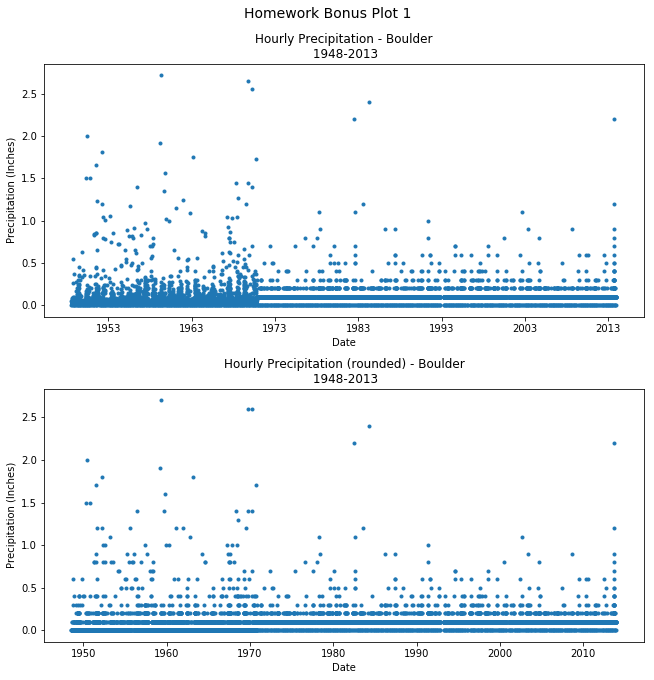

In [13]:
# BONUS PLOT 1
# DO NOT USE plt.show() anywhere in this cell

### BEGIN SOLUTION
# part 1:a plot of hourly precipitaion from 1948-2013
# create subplots and plot data
fig, ax = plt.subplots(2, figsize=(10, 10))
ax[0].plot('DATE', 'HPCP', '.', data=precip)

# set titles
fig.suptitle("Homework Bonus Plot 1", fontsize=14)
ax[0].set(xlabel='Date', ylabel='Precipitation (Inches)',
          title="Hourly Precipitation - Boulder\n 1948-2013")

# part 2: Suggest how to address that anomaly in python to make a
#   more uniform looking plot
# create rounded data column and plot data on subplot
precip['HPCP_round'] = precip['HPCP'].apply(np.round, decimals=1)
ax[1].plot('DATE', 'HPCP_round', '.', data=precip)

# set titles
ax[1].set(xlabel='Date', ylabel='Precipitation (Inches)',
          title="Hourly Precipitation (rounded) - Boulder\n 1948-2013")

# format ticks
ax[1].xaxis.set_major_locator(mdates.YearLocator(10))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# display plot
plt.tight_layout(pad=4.0, h_pad=1.0)

### END SOLUTION

### DO NOT REMOVE LINE BELOW ###
ax6 = nb.convert_axes(plt, 'last')

In [14]:
# Test Suite for Plot 6
hw2t = homework2_tests()
results = unittest.TextTestRunner().run(hw2t.p6_tests(ax6).suite)

.....s...
----------------------------------------------------------------------
Ran 9 tests in 0.231s

OK (skipped=1)


Describe and interpret data from bonus plots:

"Your Answer Here"